In [132]:
import sys
sys.path.append('/eos/home-i00/l/lkoller/data-analysis-software')
sys.path.append('/eos/home-i00/l/lkoller/SWAN_projects/commands/Lya_commands')

import fnmatch, re
from pathlib import Path
from Ldate_commands import Ldate
from datetime import datetime
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from tqdm import tqdm
from time import sleep
from datetime import datetime
import gbarDataLoader as gd

In [139]:
date = '23_12_14'
dflog = gd.loadLog(date)
dfpgun = gd.loadPGUNPC(date)

LOG file for 23_12_14 already exists.


In [146]:
m = [1,2,3,4]
n = [11,12,13,14,2]
set(m)-set(n)

{1, 3, 4}

(array([  2.,   0., 210.,   0.,   0., 254.,   0.,   6.,   0.,   2.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

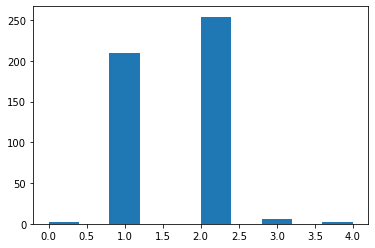

In [2]:
a = Ldate('23_12_06')
trcf = a.get_filelist()
tiff = a.get_tif_filelist()
c = sorted([int(val[-18:-8]) for val in trcf])
f = sorted([int(val[-18:-8]) for val in tiff])
trc = c[0:339] + c[340:475]
tif = f
diff = [(val - bal) for val, bal in zip(trc, tif)]
plt.hist(diff)

(array([ 2.,  0.,  0.,  0.,  0., 12.,  0.,  0.,  0.,  6.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

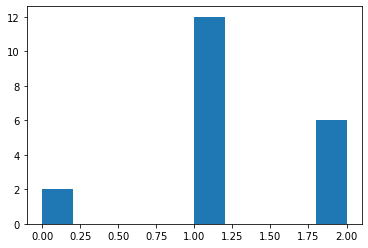

In [8]:
b = Ldate('23_12_14')
trcf = b.get_filelist()
tiff = b.get_tif_filelist()
c = sorted([int(val[-18:-8]) for val in trcf])
f = sorted([int(val[-18:-8]) for val in tiff])
trc = c[0:20]
tif = f
diff = [(val - bal) for val, bal in zip(trc, tif)]
plt.hist(diff)

(array([ 38.,   0.,   0., 144.,   0.,   0.,  15.,   0.,   0.,   2.]),
 array([4. , 4.3, 4.6, 4.9, 5.2, 5.5, 5.8, 6.1, 6.4, 6.7, 7. ]),
 <BarContainer object of 10 artists>)

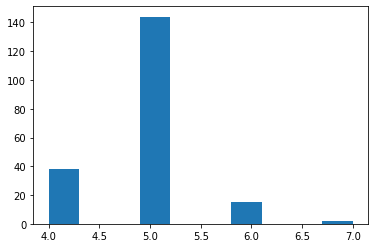

In [17]:
d = Ldate('23_12_08')
trcf = d.get_filelist()
tiff = d.get_tif_filelist()
c = sorted([int(val[-18:-8]) for val in trcf])
f = sorted([int(val[-18:-8]) for val in tiff])
trc = c[0:100]
tif = f
diff = [(val - bal) for val, bal in zip(trc, tif)]
plt.hist(diff)

(1375, 200)

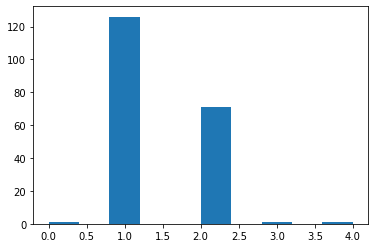

In [111]:
e = Ldate('23_12_07')
trcf = e.get_filelist()
tiff = e.get_tif_filelist()
c = sorted([int(val[-18:-8]) for val in trcf])
f = sorted([int(val[-18:-8]) for val in tiff[1:]])
trc = c
tif = f[0:100] + f[101:201]
diff = [(val - bal) for val, bal in zip(trc, tif)]
plt.hist(diff)
len(trc), len(tif)

In [131]:
d = [bal - val for val,bal in zip(c[:-1],c[1:])]
    
print(sorted(d))

[14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,

1375 205


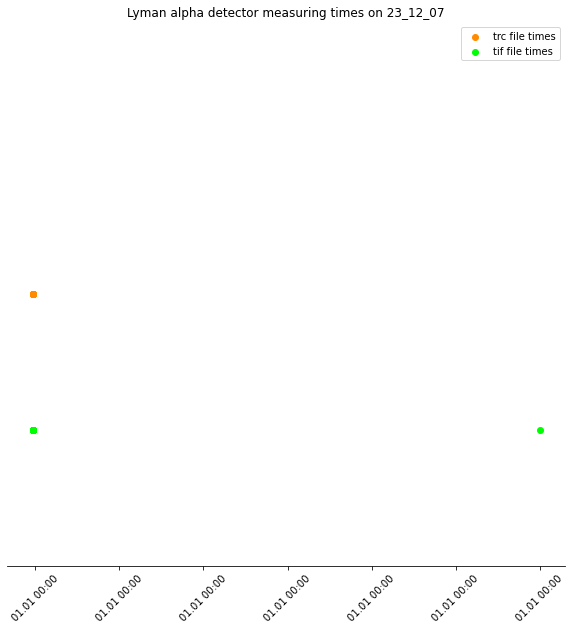

In [21]:
z = Ldate('23_12_07')
trcf = z.get_filelist()
tiff = z.get_tif_filelist()
c = sorted([int(val[-18:-8]) for val in trcf])
f = sorted([int(val[-18:-8]) for val in tiff])
print(len(c), len(f))
e.plot_measurement_time()

In [29]:
val = f[0]

out = min(c, key = lambda x:abs(x-val))
val, out

(1701863159, 1701863160)

In [120]:
np.linspace(10,40, 7)

array([10., 15., 20., 25., 30., 35., 40.])